# Scratch
Bits of work which I'll eventualy integrate into the `Bicycle` class

## The "lollipop" system
We want to see how the acceleration of a flywheel mounted above the bicycle can stabilize its frame for small angles.

We'll start with values for theta and theta_dot, which will produce a believeable phi double dot vale. We can then plug that in to our system of ODEs for theta double dot.

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.8

# bicycle frame
m = 15 # in kg
l = 1 # in m

# flywheel
m_flywheel = 0.5 # (mass of the flywheel)
r = 0.15 # radius of the flywheel (m)
I = (1/2) * m_flywheel*(r**2)

gamma = 1 # proportionality constant
zeta = 0 # damping coefficient

# the initial tilt angle and velocity
theta_0 = np.radians(5)
theta_dot_0 = 0 # in rad/s

In [3]:
phi_double_dot = ((m*(l**2))/I)*(theta_0*(g/l + gamma) - zeta*theta_dot_0)

In [4]:
print('phi double dot: ', phi_double_dot)

phi double dot:  2513.2741228718346


Lets now plug in this value for phi double dot into our systme of ODEs for theta double dot

In [5]:
thetadoubledot = theta_0*(g/l) - (I/(m*l**2))*phi_double_dot

In [6]:
print('term 1 + 2:', theta_0*(g/l) - (I/(m*l**2))*phi_double_dot)

term 1 + 2: -0.08726646259971649


In [7]:
print('term 3 + 4:', gamma*theta_0)

term 3 + 4: 0.08726646259971647


In [84]:
print(thetadoubledot) # in rad/s^2

-1.3877787807814457e-17


Now we want to break this equation into two first-order diff eqs.

In [44]:
# theta'(t) = omega(t)
# omega'(t) = theta*(g/l + gamma) - (zeta*omega) - phi_double_dot

def lollipop(y, t):
    theta, omega = y
    dydt = [omega, theta*(g/l + gamma) - (I/(m*l**2))*phi_double_dot + (zeta*omega)]
    return dydt


y0 = [theta_0, theta_dot_0] # set our initial condition vector

t = np.linspace(0, 10, 101)

sol = odeint(lollipop, y0, t)

# print(sol)


Lets plot our results...

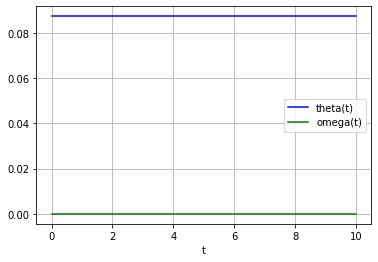

In [45]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [ ]:
# # reference
# theta'(t) = omega(t)
# omega'(t) = -b*omega(t) - c*sin(theta(t))

# def pend(y, t, b, c):
#     theta, omega = y
#     dydt = [omega, -b*omega - c*np.sin(theta)]
#     return dydt

# Another attempt
This time, we will focus on theta double dot with the phi as set.

In [1]:
thetadoubledot = theta_0*(g/l) - (I/(m*l**2))*phi_double_dot

NameError: name 'theta_0' is not defined

Archived

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 101)

g = 9.8

m = .5
l = 1 # 1 meter for now, we can tweak later... (its the height of the bike frame)
I = .5 * m * l**2

zeta = # damping coefficient
gamma = #some proportionality constant, fidde with it

def lollipop():
    # could make some determinances within the function
    
    """our lollipop equation""":
    d = ((m*l**2)/I) * (theta(g/l + gamma) - zeta*omega)
   
    # TODO: split into two first order equations
    
    # could print out the time steps here
    
    return alpha



# sol = odeint(lollipop, y0, t, args=(b, c))

SyntaxError: invalid syntax (<ipython-input-14-599044fb5972>, line 13)